## Getting Started with Semi-Supervised Learning via Graph Neural Networks with the Karate Club Dataset
Group Members: Lingfeng Liu, Mingxuan Nie, Steven Zhang, and Tiankuo Zhang 

### Importing Graph Data + Data Exploration

- Use Pandas to Laod in CSV data of the Karate Club Dataset
- The Karate Club Dataset was already transformed into CSV format

In [1]:
import pandas as pd

nodes = pd.read_csv('data/nodes.csv')
print(nodes)

    Id     Club  Age
0    0   Mr. Hi   45
1    1   Mr. Hi   33
2    2   Mr. Hi   36
3    3   Mr. Hi   31
4    4   Mr. Hi   41
5    5   Mr. Hi   42
6    6   Mr. Hi   48
7    7   Mr. Hi   41
8    8   Mr. Hi   30
9    9  Officer   35
10  10   Mr. Hi   38
11  11   Mr. Hi   44
12  12   Mr. Hi   37
13  13   Mr. Hi   39
14  14  Officer   36
15  15  Officer   38
16  16   Mr. Hi   47
17  17   Mr. Hi   45
18  18  Officer   41
19  19   Mr. Hi   31
20  20  Officer   31
21  21   Mr. Hi   44
22  22  Officer   42
23  23  Officer   32
24  24  Officer   30
25  25  Officer   50
26  26  Officer   30
27  27  Officer   43
28  28  Officer   48
29  29  Officer   40
30  30  Officer   39
31  31  Officer   45
32  32  Officer   47
33  33  Officer   33


We see that the node.csv file contains three columns:
- Id representing numerical index of each node
- Club representing which party they are affiliated with
- Age which is general information about each person/node

In [2]:
edges = pd.read_csv('data/edges.csv')
print(edges)

     Src  Dst    Weight
0      0    1  0.318451
1      0    2  0.551215
2      0    3  0.227416
3      0    4  0.266919
4      0    5  0.475449
..   ...  ...       ...
151   33   28  0.266479
152   33   29  0.279901
153   33   30  0.652154
154   33   31  0.828536
155   33   32  0.842656

[156 rows x 3 columns]


We see that the edges.csv file contains three columns:
- Src representing the source vertex of the edge
- Dst representing the destination vertex of the edge
- Weight representing the weight or strength of the edge connecting the two vertices

In [3]:
# Create a DGL using the Deep Graph Library
import dgl
import numpy as np

# Create Numpy Arrays of the Src and Dst  in order to construct our graph
src = np.array(edges['Src'])
dst = np.array(edges['Dst'])

# print(type(src))

graph = dgl.graph((src,dst)) 

print(graph)

c:\Users\steve\anaconda3\envs\GNN-base\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Graph(num_nodes=34, num_edges=156,
      ndata_schemes={}
      edata_schemes={})


Creating a graph using the DGL library gave us a graph with 34 nodes and 156 edges. Next, let us use the NetworkX library to convert this graph.

c:\Users\steve\anaconda3\envs\GNN-base\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


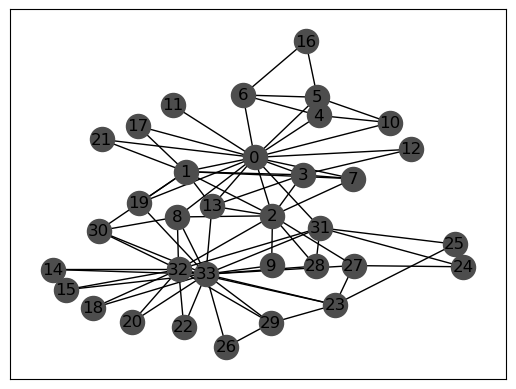

In [4]:
import networkx as nx

nxGraph = graph.to_networkx().to_undirected()

# Visualize our graph
position = nx.kamada_kawai_layout(nxGraph)
nx.draw_networkx(nxGraph, position, with_labels = True, node_color = [0.3, 0.3, 0.3])

As you can see above we constructed a graph visualizing the relationships between each person in the Karate Club Dataset. Next let us do some Data exploration on the graph.

In [5]:
print('Nodes: ', graph.number_of_nodes())
print('Edges:', graph.num_edges())

Nodes:  34
Edges: 156


In [6]:
print("Degree of the 0th Node: ", graph.in_degrees(0))
print("Successors of the 0th Node: ", graph.successors(0))

Degree of the 0th Node:  16
Successors of the 0th Node:  tensor([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31])


### Loading our Graph Data to PyTorch to Perform GNN

Next, we can load our data in order for GNN's to learn off the data provided. When we created the graph we only looked at the edges and nodes. Now, we need to update our created graph with the following data columns provided to us:
- Age
- Club
- Weight

In [7]:
import torch

# Data Cleaning
# Normalize the age data column
age = torch.tensor(np.array(nodes['Age'])).float() / 100
print(age)

# Set the normalized data to the graph
graph.ndata['Age'] = age
print(graph)

tensor([0.4500, 0.3300, 0.3600, 0.3100, 0.4100, 0.4200, 0.4800, 0.4100, 0.3000,
        0.3500, 0.3800, 0.4400, 0.3700, 0.3900, 0.3600, 0.3800, 0.4700, 0.4500,
        0.4100, 0.3100, 0.3100, 0.4400, 0.4200, 0.3200, 0.3000, 0.5000, 0.3000,
        0.4300, 0.4800, 0.4000, 0.3900, 0.4500, 0.4700, 0.3300])
Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'Age': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={})


In [8]:
# Club data column
club = list(nodes['Club'])
# Convert Label to integer/numerical values
club = torch.tensor([c == 'Officer' for c in club]).long()
# Create a one-hot encoding version of the club data as well
club_OneHotEncode = torch.nn.functional.one_hot(club)

print(club_OneHotEncode)


tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]])


In [9]:
# Feed Cleaned Data to the Graph
graph.ndata.update({'club': club, 'club_onehot': club_OneHotEncode})
print(graph)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'Age': Scheme(shape=(), dtype=torch.float32), 'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={})


In [10]:
# Feed edge Weights to the Graph
edgeWeights = torch.tensor(np.array(edges['Weight']))
graph.edata['Weight'] = edgeWeights
print(graph)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'Age': Scheme(shape=(), dtype=torch.float32), 'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={'Weight': Scheme(shape=(), dtype=torch.float64)})


Now our DGL Graph has been populated with the cleaned data provided to us. The networkX graph created was used to visualize basic relationships. Also, when feeding data to the graph the functions .ndata() representing feeding node data and .edata() represents feeding edge data.

### Community Detection using GNN's via Node Classification Task

In [11]:
import itertools
import torch.nn as nn

Specify the features and labels we are going to use to train the GNN.

In [12]:
# Features
# Find embedding Weights - updated during the training process for each node
node_Embeddings = nn.Embedding(graph.number_of_nodes(), 4) # Each node embedding for each node will have a embedding size of 4
inputs = node_Embeddings.weight
nn.init.xavier_uniform_(inputs)
print(inputs)

Parameter containing:
tensor([[ 0.3048, -0.0829,  0.3042,  0.0841],
        [ 0.0608, -0.2647, -0.2007,  0.0742],
        [-0.0646, -0.0946, -0.0041,  0.3603],
        [ 0.2236, -0.2419, -0.0510, -0.0761],
        [ 0.1530, -0.1499, -0.1616, -0.3354],
        [-0.2669,  0.3308,  0.3359,  0.1378],
        [ 0.0139, -0.1772, -0.2375, -0.2320],
        [ 0.1308, -0.2788,  0.1444,  0.0090],
        [ 0.1865,  0.0242,  0.3845, -0.1100],
        [-0.1836,  0.0805,  0.3355, -0.1551],
        [ 0.2237,  0.0159, -0.2815,  0.3558],
        [ 0.2700,  0.2631,  0.0660,  0.2099],
        [-0.2698, -0.2616, -0.3327,  0.2054],
        [ 0.0639,  0.1934, -0.3030, -0.2954],
        [-0.3495,  0.2930,  0.2620,  0.2743],
        [-0.2055,  0.2838,  0.1518,  0.1783],
        [-0.1700, -0.0295, -0.1319, -0.3609],
        [-0.0271, -0.3469, -0.0861, -0.1479],
        [-0.3424, -0.1814,  0.2390,  0.3914],
        [ 0.3226,  0.3942,  0.1127, -0.0292],
        [-0.2783,  0.2511,  0.2310,  0.0166],
        [-0.

In [13]:
# Labels
label = graph.ndata['club']
labeledNodes = [0, 33]
print('Labels', label[labeledNodes])

Labels tensor([0, 1])


### Create our GNN Model - Look at different Convolution Graph Layers
In this example we can start with using the GraphSAGE model. The gist is this model would calculate new node representations by aggregating new information from neighboring nodes. The GraphSAGE model can be referenced [here](https://arxiv.org/pdf/1706.02216.pdf).

In [14]:
from dgl.nn import SAGEConv
import torch.nn as nn

# Model Construction
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_feats, h_feats, num_classes): # in_features represent the input feature size and h_feats represent the output feature size
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, num_classes, 'mean')

    def forward(self, graph, in_feats):
        h = self.conv1(graph, in_feats)
        h = torch.nn.functional.relu(h)
        h = self.conv2(graph, h)
        return h

# Model consists: GraphSAGE Convolution Layer -> ReLU function -> another GraphSAGE Convolution Layer

model = GraphSAGE(4, 16, 2) # Create our GraphSAGE model with 4 node embeddings(input features), hidden layers of dimension 16(output feature size), output layer of dimension 2 representing our two classes for our label  

After creating our basic Model Construction, we now specify the loss and optimizer functions.

In [15]:
# Define the Optimizer; We will be using ADAM
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), node_Embeddings.parameters()), lr = 0.01)

# Define the training loop and Loss Function
allLogits = []
for e in range(100):
    # Foward Propagation
    logits = model(graph, inputs) # Feed Forward the graph and node embeddings

    # Loss
    logp = nn.functional.log_softmax(logits, 1)
    loss = nn.functional.nll_loss(logp[labeledNodes], label[labeledNodes]) # Comparing the result from the trained model and the ground-truch labels of the dataset

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    allLogits.append(logits.detach())

    if e % 5 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

In epoch 0, loss: 0.8142176866531372
In epoch 5, loss: 0.5604199171066284
In epoch 10, loss: 0.3656386137008667
In epoch 15, loss: 0.1909312903881073
In epoch 20, loss: 0.07549083232879639
In epoch 25, loss: 0.025670353323221207
In epoch 30, loss: 0.009069920517504215
In epoch 35, loss: 0.003768408903852105
In epoch 40, loss: 0.0019138241186738014
In epoch 45, loss: 0.0011591126676648855
In epoch 50, loss: 0.0008072591153904796
In epoch 55, loss: 0.0006232364685274661
In epoch 60, loss: 0.000516854168381542
In epoch 65, loss: 0.0004500158247537911
In epoch 70, loss: 0.0004046199028380215
In epoch 75, loss: 0.0003716735518537462
In epoch 80, loss: 0.0003461734449956566
In epoch 85, loss: 0.00032561796251684427
In epoch 90, loss: 0.0003077431465499103
In epoch 95, loss: 0.0002923109568655491


In [16]:
# Verify results of training the Model
predictions = torch.argmax(logits, axis = 1)
print('Accuracy: ', (predictions == label).sum().item() / len(predictions))

Accuracy:  1.0


### Visualize Training Process
After training the GNN model, we want to visualize and understand what exactly happened durring the training process.

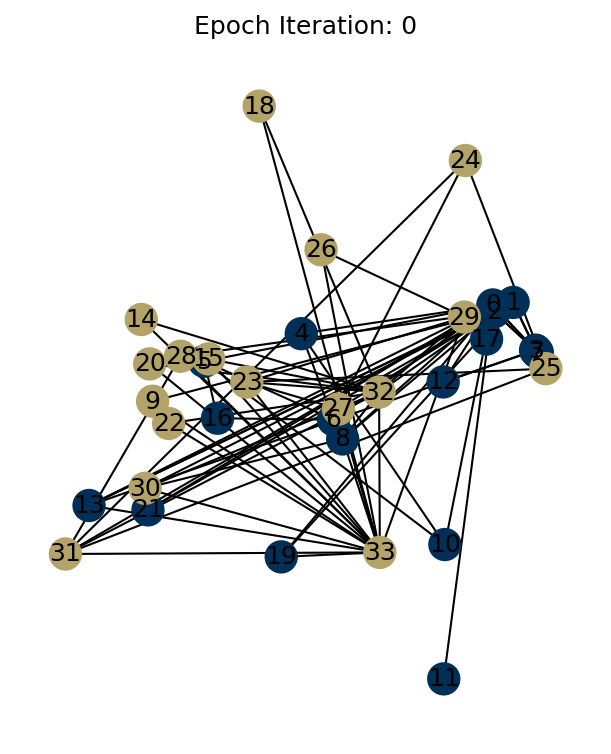

In [17]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams['figure.figsize'] = (5, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['animation.html'] = 'html5'

# Node Classification Visualiztion via (logits) output varaible

import networkx as nx 
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure(dpi = 150)
fig.clf()
ax = fig.subplots()
nxGraph = graph.to_networkx().to_undirected()

def draw(i):
    class1Color = '#B3A369'
    class2Color = '#003057'
    position = {}
    colors = []
    for v in range(34): # Loop over each vertex
        prediction = np.array(allLogits[i])
        position[v] = prediction[v]
        vertexClass = label[v]
        colors.append(class1Color if vertexClass else class2Color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch Iteration: %d' % i)
    nx.draw_networkx(nxGraph, position, node_color = colors, with_labels = True, node_size = 225)

animate = animation.FuncAnimation(fig, draw, frames = len(allLogits), interval = 200)
HTML(animate.to_html5_video())

### Using GNN Explainer + Observations + Possible Hyperparameter Tuning Techniques + Conclusions
What if we want to figure out why the GNN classified a certain node what class? We use the GNNExplainer package which can be referenced from the paper [here](https://arxiv.org/abs/1903.03894).

GNNExplainer applied to a Node Classification Task will give us 4 outputs:
- new_node_id which represents the new ID of the input center node
- sg which is the subgraph created from the k_hops while aggregating neighboring information
- feat_mask which represents the feature importance mask representing higher values mean more importance
- edge_mask which represents the importance mask for the edges representing higher values mean more importance

In [29]:
# from dgl.nn.pytorch.explain import GNNExplainer

# # Explain the prediction for Node 21
# explainer = GNNExplainer(model, num_hops=1) # Number of hops represent hops for GNN information aggregation
# new_center, sg, feat_mask, edge_mask = explainer.explain_node(21, graph, inputs)

# print("New Center: ", new_center)
# print("Subgraph Number of Edges: ", sg.num_edges())
# print("Subgraph Old IDs of the nodes: ", sg.ndata[dgl.NID])
# print("Subgraph Old IDs of the edges: ", sg.edata[dgl.EID])
# print("Feature Importance Mask: ", feat_mask)
# print("Edge Importance Mask: ", edge_mask)

### Comparing GNN to an In Class Method: Spectral Clustering
Because by nature Spectral Clustering, we create graphs from the dataset provided. We hope to see what effect Spectral Clustering can be of use to a problem which GNN handles.

In [33]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(1)

# Karate CLub Dataset
graph = nx.karate_club_graph()

# Get the labels of our graph in the form of numpyarray to confirm for accuracy
class_dict = nx.get_node_attributes(graph, 'club')
labels = [class_dict[i] for i in graph.nodes()]
labels = np.array([0 if i == 'Mr. Hi' else 1 for i in labels])

print('Ground Truth Labels:', labels)

Ground Truth Labels: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
# Use the adjacency matrix to train the Spectral Clustering Model
adjMatrix = nx.to_numpy_array(graph)
print(adjMatrix)


[[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]


Use Principal Component Analysis to reduce the dimension of the Graph Dataset to 2 Dimensions to help with visualizing how the data gets clustered.

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(adjMatrix)

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 1.81644576,  1.32464881],
       [ 1.43684722,  1.38527327],
       [ 0.72284184,  1.22839847],
       [ 0.67909348,  0.19806813],
       [ 0.30481667, -0.3717133 ],
       [ 0.42109885, -0.4312481 ],
       [ 0.40254563, -0.4062839 ],
       [ 0.72291925,  0.11501625],
       [-0.26829573,  0.10064047],
       [-0.0697844 , -0.40458433]])

In [44]:
# Perform Spectral Clustering
spectralClusteringModel = SpectralClustering(2, affinity='precomputed', n_init=100) # We want two clusters
predictions = spectralClusteringModel.fit_predict(adjMatrix)

c:\Users\steve\anaconda3\envs\GNN-base\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
# See the predictions versus the actual labels
# print('Spectral Clustering Predictions:', np.abs(spectralClusteringModel.labels_ - 1))
print('Spectral Clustering Predictions:', (spectralClusteringModel.labels_))

# See the actual labels
print('Actual Labels:                  ', labels)

Spectral Clustering Predictions: [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
Actual Labels:                   [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [47]:
# Calculate the Accuracy Metrics
print("Adjusted RandIndex Score:", metrics.adjusted_rand_score(labels, np.abs(spectralClusteringModel.labels_ - 1))) # RandIndex computes the similiarity measure between two clusters; Closer to 1 represents higher accuracy
print("Adjusted Mutual Information Score:", metrics.adjusted_mutual_info_score(labels, np.abs(spectralClusteringModel.labels_ - 1))) # Adjusted Mutual Information (Probabilistic Based Accuracy Measurement)

Adjusted RandIndex Score: 0.8822575413558222
Adjusted Mutual Information Score: 0.8334659946350966


### Visualize the results of Spectral Clustering

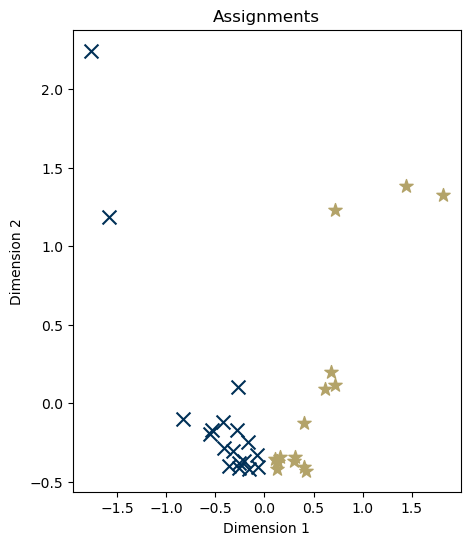

In [50]:
def plot_clusters(samples, clusters):
    col_dic = {0:'#B3A369',1:'#003057'}
    mrk_dic = {0:'*',1:'x'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, predictions)